## Main Results of Derrida and Evans

- $y_t$: the distance travelled by the defect particle (total number of hops forward minus total number of hops backward)

- In the steady state, $y_t$ is a random variable

- Its first moment gives the velocity $v$ of the defect particle

$$
v=\lim_{t\to\infty}\frac{<y_t>}{t}
$$
- Its second moment gives the diffusion constant $\delta_1$ of the defect particle
 
$$
\Delta =\lim_{t\to\infty}\frac{<y_t^2>-<y_t>^2}{t}
$$

- All cumulants of $y_t$ can be computed from the knowledge of the generatiing function $<e^{\gamma y_t}>$ via

$$
<y_t^n>_{c}=\frac{d^n}{d\gamma^n}\ln <e^{\gamma y_t}>|_{\gamma=0}.
$$

$$
\lambda(\gamma)=\lim_{t\to\infty}\frac{\ln <e^{\gamma y_t}>}{t} \to v=\frac{d}{d\gamma}\lambda(\gamma)|_{\gamma=0},\Delta =\frac{d^2}{d\gamma^2} \lambda(\gamma)|_{\gamma=0}
$$

- In the thermodynamic limit ($L,M$ large) with fixed density $\rho=M/L$, $v$ and $\Delta$ have the following asymptotic forms in different regions of the 
parameter space $\alpha,\beta,\rho$

- $\beta>\rho>1-\alpha$:

$$
v=1-2\rho, \Delta\simeq \frac{(L\pi \rho(1-\rho))^{1/2}}{4}
$$

- $\beta<\rho,1-\alpha<\rho$

$$
v=1-\beta-\rho,\Delta=\frac{\beta(1-\beta)}{\rho-\beta}
$$

- $\beta>\rho,1-\alpha>\rho$

$$
v=\alpha-\rho,\Delta=\frac{\alpha(1-\alpha)}{1-\rho-\alpha}
$$
- $\beta<\rho<1-\alpha$

$$
v=\alpha-\beta,\Delta=\frac{\beta(1-\beta)+\alpha(1-\alpha)}{1-\alpha-\beta}
$$

- $\alpha=1$, There are two phases.

- $\beta>\rho$:$v=1-2\rho,\Delta\simeq \frac{(L\pi \rho(1-\rho))^{1/2}}{4}$

- $\beta<\rho$:$v=1-\beta-\rho,\Delta=\frac{\beta(1-\beta)}{\rho-\beta}$



# Simulation Program

Program: TASEP_with_Defect.c

- How to compile. 

- $random.h$ is neccesary. 

gcc -O3 TASEP_with_Defect.c -lm

- How to run. 

./a.out 1000000 1.0

$N\in \{1,5,10,15,\cdots,95\},L=100$


# Simulation Program

Program: TASEP_with_Defect.c

- How to compile. 

- $random.h$ is neccesary. 

gcc -O3 TASEP_with_Defect.c -lm

- How to run. 

./a.out 1000000 1.0

$N\in \{1,5,10,15,\cdots,95\},L=100$

$$
E[v_0]=(1-\rho)-\beta \rho
$$

- $v_1$ is the velocity of particle 1.

- $\beta=1$

$$
E[v_1]=(1-\rho)
$$

#### t_N_vs_x0_L100.csv and t_N_vs_x1_L100.csv

- Time series data of the movement of particle 0(defect) and 1 as function of $t$(row) and $N$(column).

# DATA Analysis

- $\beta=1$

In [53]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
import array
import math

In [54]:
rho_vs_J_v = pd.read_csv("rho_vs_J_v0_mean_v1_mean_L1000_beta0.7_with_Defect.csv")

In [55]:
rho_vs_J_v.head(5)

,rho,J,v0_mean,v1_mean
0,0.01,0.009904,0.978805,0.990248
1,0.05,0.047531,0.902285,0.950678
2,0.10,0.090046,0.801581,0.900412
3,0.15,0.127658,0.698860,0.851069
4,0.20,0.160188,0.599170,0.800953


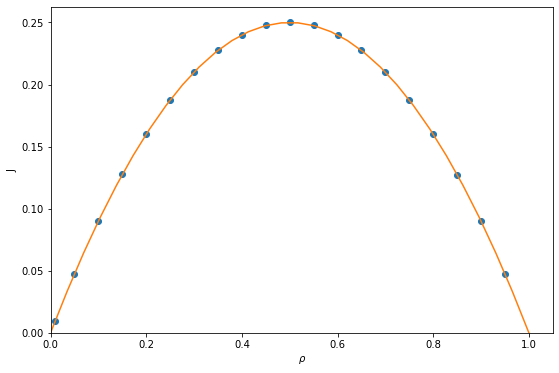

In [56]:
plt.figure(figsize=(9,6))
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['J'], linestyle='None', marker='o')
x=np.linspace(0,1,30)
plt.plot(x, x*(1-x))
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')

plt.show()

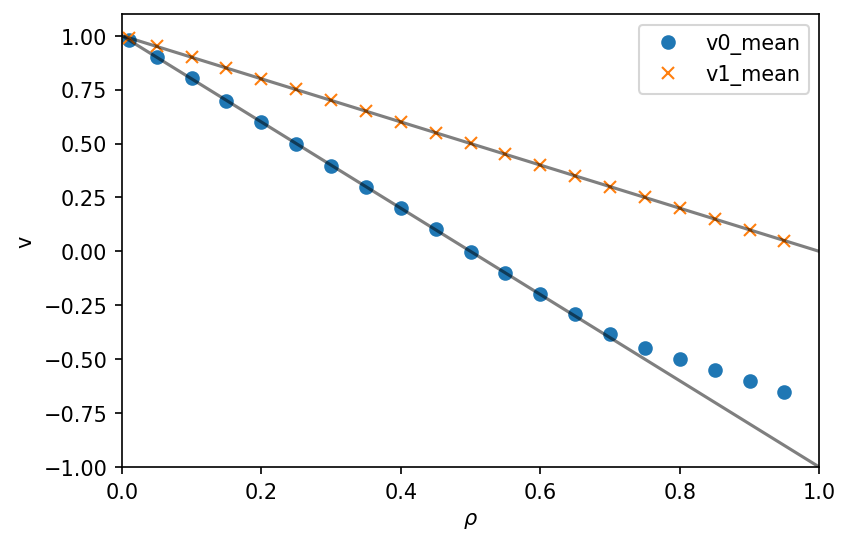

In [57]:
from cProfile import label


plt.figure(dpi=150)
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['v0_mean'], linestyle='None', marker='o', label='v0_mean')
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['v1_mean '], linestyle='None', marker='x', label='v1_mean')
x=np.linspace(0,1,30)
plt.plot(x, 1-x, color='k', alpha=0.5)
plt.plot(x, 1-2*x, color='k', alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,)
plt.xlabel(r'$\rho$')
plt.ylabel('v')
plt.legend()

plt.show()

# Velocity Distribution

In [58]:
d1 = dt.fread('t_N_vs_x0_L1000_beta0.7_with_Defect.csv')
d2 = dt.fread('t_N_vs_x1_L1000_beta0.7_with_Defect.csv')
d1 = d1.to_pandas()
d2 = d2.to_pandas()

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
d1.head(10)

,t,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,1,0,-1,0,0,2,1,2,2,0,1,0,0,-1,1,0,1,0,0
2,2,3,2,-1,0,0,0,3,2,2,2,0,1,1,0,-1,1,0,3,0,0
3,3,6,2,-1,0,1,0,3,4,4,2,2,2,1,0,0,2,0,3,0,0
4,4,6,2,-1,0,1,3,4,5,4,2,2,2,1,2,0,2,1,3,0,0
5,5,6,2,-1,2,1,3,6,5,6,2,3,2,1,2,0,2,1,3,0,-1
6,6,7,3,0,3,1,6,6,5,6,3,4,2,1,2,0,2,1,4,0,-1
7,7,8,3,-1,5,1,6,8,6,6,4,4,3,1,2,0,2,1,4,0,-1
8,8,8,4,-1,6,1,6,11,6,6,4,5,3,2,2,0,2,2,5,0,-1
9,9,10,5,-1,5,1,9,11,6,7,4,5,2,2,2,0,3,2,5,0,-1


In [61]:
d2.head(10)

,t,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,106,7,3,9,1,9,4,2,4,2,1,2,2,3,1,2,1,3,1,1
1,1,108,8,3,9,1,10,4,4,5,3,1,2,2,3,1,3,1,3,1,1
2,2,109,8,4,9,1,10,6,5,6,3,3,2,2,3,2,3,1,4,1,1
3,3,110,9,4,9,2,10,9,5,7,3,4,3,2,3,2,3,2,5,1,1
4,4,110,13,4,9,2,10,11,7,7,3,5,3,2,3,2,3,2,5,1,1
5,5,110,14,4,11,2,10,12,7,7,4,5,3,2,3,2,3,2,5,1,1
6,6,113,16,6,11,2,10,12,8,7,5,5,4,2,3,2,3,2,6,1,1
7,7,114,18,6,11,2,11,12,8,7,6,6,4,3,3,2,3,2,6,1,1
8,8,114,18,8,14,2,12,12,8,7,6,7,4,3,3,2,3,3,6,1,1
9,9,114,19,8,15,2,13,12,11,8,6,9,5,3,3,3,4,3,6,1,1


In [62]:
def xt_dt2vt(xt, dt):
    dx = xt.diff(dt)
    vt = dx/dt

    return(vt[dt:])

- $N=2$

In [63]:
var_vt_4 =    np.var(xt_dt2vt(d1['1'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['1'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['1'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['1'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['1'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['1'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['1'],1000))

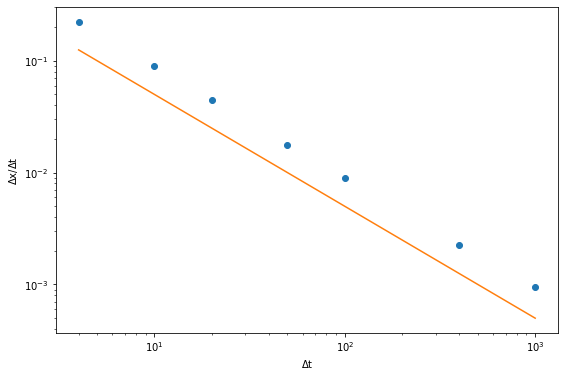

In [64]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(4,1000,10)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$x/$\Delta$t')

plt.show()

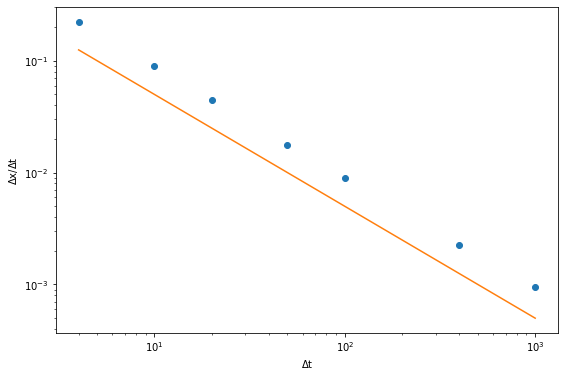

In [65]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(4,1000,10)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$x/$\Delta$t')

plt.show()

- $N=20$

In [66]:
var_vt_4 =    np.var(xt_dt2vt(d1['20'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['20'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['20'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['20'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['20'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['20'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['20'],1000))

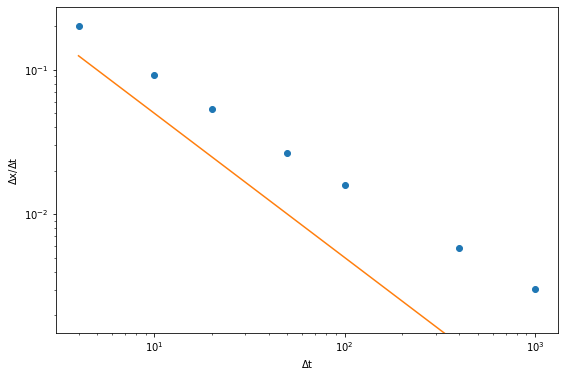

In [67]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(4,1000,10)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0015,)
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$x/$\Delta$t')

plt.show()

- $N=50$

In [68]:
var_vt_4 =    np.var(xt_dt2vt(d1['50'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['50'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['50'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['50'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['50'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['50'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['50'],1000))

In [69]:
var_vt_4,var_vt_1000

(0.19691227833066086, 0.004091719372829619)

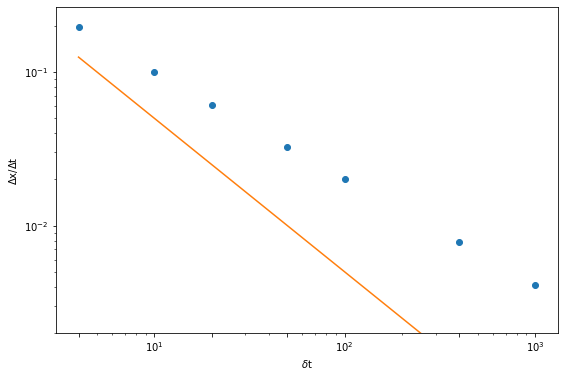

In [70]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(4,1000,10)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.002,)
plt.xticks(ts)
plt.xlabel(r'$\delta$t')
plt.ylabel(r'$\Delta$x/$\Delta$t')

plt.show()

- $N=95$

In [71]:
var_vt_4 =    np.var(xt_dt2vt(d1['95'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['95'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['95'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['95'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['95'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['95'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['95'],1000))

In [72]:
var_vt_4,var_vt_1000

(0.18318767490029275, 0.0009261360104890757)

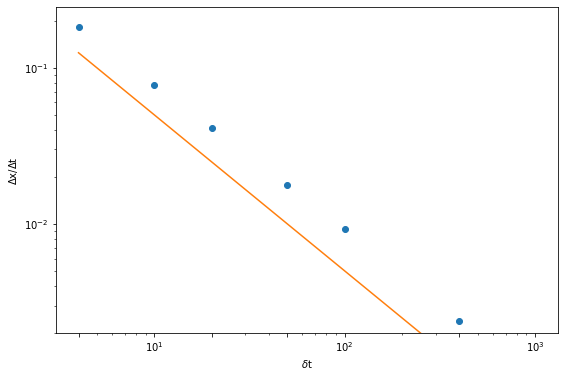

In [73]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(4,1000,10)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.002,)
plt.xticks(ts)
plt.xlabel(r'$\delta$t')
plt.ylabel(r'$\Delta$x/$\Delta$t')

plt.show()

## Diffusion constant

In [74]:
rho=rho_vs_J_v['rho']

In [75]:
def diffusion(xt, dt):
    dx = np.var(xt.diff(dt))
    diff = dx/dt

    return diff

In [76]:
delta = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],4)
    delta.append(d)

delta

[0.8936356318818164,
 0.9008012029273126,
 0.8612918005371042,
 0.8264847156085952,
 0.808745155940553,
 0.7947457979250805,
 0.7940548253264988,
 0.7895957595402722,
 0.7863202535494833,
 0.7871485424179621,
 0.7876491133226434,
 0.7871875228524065,
 0.789580440862707,
 0.7883705759563343,
 0.7888361291490127,
 0.7922074230781395,
 0.7845026550931518,
 0.770822416056799,
 0.7530140444844309,
 0.732750699601171]

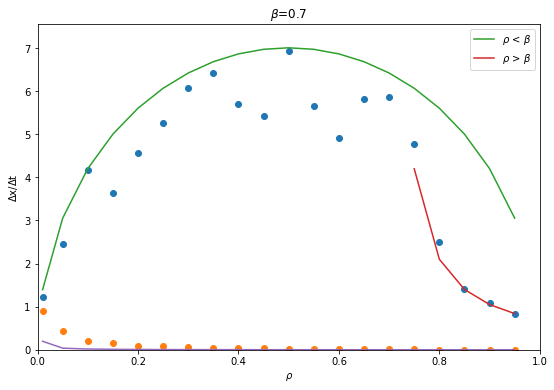

In [88]:
from unicodedata import name


delta1 = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],10000)
    delta1.append(d)

delta2 = []
for i in range(1,21):
    d = diffusion(d2.iloc[:,i],10000)
    delta2.append(d)


b = 0.7
L = 1000

plt.figure(figsize=(9,6))
plt.plot(rho, delta1, linestyle='None', marker='o')
plt.plot(rho, delta2, linestyle='None', marker='o')

plt.plot(rho, np.sqrt(L*math.pi*(rho-np.square(rho)))/4, label=r'$\rho$ < $\beta$')
plt.plot(rho, b*(1-b)/(rho-b), label=r'$\rho$ > $\beta$')
plt.plot(rho, 2*(1-rho)/(L*rho))
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,1)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Delta$x/$\Delta$t')
plt.title(r'$\beta$=0.7')
plt.legend()
plt.savefig('beta0.7_L1000.png', dpi=600)

plt.show()

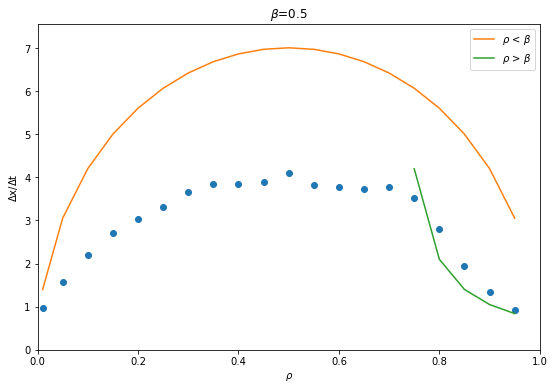

In [81]:
delta = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],1000)
    delta.append(d)


b = 0.7
L = 1000

plt.figure(figsize=(9,6))
plt.plot(rho, delta, linestyle='None', marker='o')
plt.plot(rho, np.sqrt(L*math.pi*(rho-np.square(rho)))/4, label=r'$\rho$ < $\beta$')
plt.plot(rho, b*(1-b)/(rho-b), label=r'$\rho$ > $\beta$')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,1)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Delta$x/$\Delta$t')
plt.title(r'$\beta$=0.5')
plt.legend()

plt.show()